
# Predicting Preventable Cardiovascular Risk: Identifying Statin Patients Likely to Become Non-Adherent

This notebook presents a real-world health analytics project using **890,180 patient records** of statin users in the Czech Republic (2017–2020).  
The goal is to understand **medication adherence patterns**, identify **patients most likely to discontinue therapy**, and provide **data-driven insights** to support better cardiovascular outcomes.

---
 

## Project Objectives

The key objectives of this analysis are to:

1. Understand patterns of medication adherence across demographics  
2. Identify patient groups most likely to stop taking statins  
3. Build a predictive model to flag high-risk patients early  
4. Prepare actionable insights for a Power BI dashboard to support public health decision-makers  


## Why This Matters

Statins are prescribed to prevent heart attacks and strokes. When patients discontinue taking them, the risk of hospitalisation increases sharply. **Improving adherence is a public health priority** and can reduce preventable healthcare costs.

## Dataset

This dataset contains anonymised administrative claims data provided by **six Czech health insurance funds**, covering about **40% of the national population**.  
It includes:
- Over **890,000 patients** and **1.39 million prescription events**  
- Patient demographics, statin type and dosage, refill patterns, and treatment gaps  
- Variables like age group, gender, and treatment intensity  

**Source:** Figshare (Ales Tichopád & Geb Donin, 2025)

## Tools & Technologies

**Python:** Pandas, Scikit-learn, Matplotlib, Seaborn  
- **Power BI:** for visual storytelling and stakeholder dashboards  
- **Machine Learning:** classification models for early risk detection

## Approach

1.  **Exploratory Data Analysis (EDA)** — to uncover adherence patterns and demographic differences  
2. **Feature Engineering** — to identify key predictors of non-adherence  
3. **Predictive Modeling** — to classify patients as *Adherent* or *Non-Adherent*  
4. **Dashboard Creation** — to present actionable insights to healthcare and policy leaders   

###  Impact
By combining clinical insight with data analytics, this project demonstrates how health data can be used to:
- Detect early warning signs of medication non-adherence  
- Guide patient engagement strategies  
- Support national-level public health interventions





In [17]:
# import the required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set chart styling 
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6) 
print(" Libraries loaded successfully!")


 Libraries loaded successfully!


## 1. Data Loading and Initial Exploration

In this section, I loaded the dataset containing anonymised prescription records of statin users in the Czech Republic between 2017 and 2020.  
The goal is to confirm that the dataset loads correctly, inspect its structure, and check the number of records and columns before proceeding to  any cleaning or transformation.

Key tasks in this step:
- Load the CSV file from my working directory (semicolon-separated format)  
- Verify the total number of records and columns  
- Check the unique patient count to understand the population size  
- Display the first few rows to preview the structure


In [50]:
# ============================================================
#  Load the Dataset
# ============================================================
# Loading 890,180 patient records from Czech health insurance data
# This dataset contains statin prescription history from 2017-2020

# Load the CSV file (semicolon-separated)
df = pd.read_csv("C:/Users/felic/OneDrive/Public_Health_Analytics_Portfolio/statin_cohort.csv", sep=';')

# Display basic information
print("="*60)
print(" DATASET LOADED SUCCESSFULLY")
print("="*60)
print(f" Total Records: {df.shape[0]:,}")
print(f" Total Columns: {df.shape[1]}")
print(f" Unique Patients: {df['patientid'].nunique():,}")
print(f"\n Column Names: {df.columns.tolist()}")

# Preview the first few rows
df.head()


 DATASET LOADED SUCCESSFULLY
 Total Records: 1,390,976
 Total Columns: 8
 Unique Patients: 890,180

 Column Names: ['patientid', 'gender', 'age_group', 'duration_days', 'days_without_coverage', 'incident', 'order', 'statin_intensity']


,patientid,gender,age_group,duration_days,days_without_coverage,incident,order,statin_intensity
0,1,Females,60-74,42,0.00,1,1,high
1,1,Females,60-74,544,244.00,1,2,high
2,2,Males,75-89,321,131.00,0,1,low/moderate
3,2,Males,75-89,148,58.00,0,2,high
4,2,Males,75-89,307,217.00,0,3,low/moderate


In [56]:
df_sample = df.sample(5000, random_state=42)
df_sample.to_csv("C:/Users/felic/OneDrive/Public_Health_Analytics_Portfolio/statin_sample.csv", index=False)



## 2. Understanding the Data

Each row in this dataset represents a **single statin prescription event**.  
By understanding what each column means, I can identify which variables relate to patient behaviour and which might predict treatment adherence.

| Column | Description |
|--------|-------------|
| **patientid** | Unique identifier for each patient |
| **gender** | Patient's gender (Male/Female) |
| **age_group** | Age range of the patient (e.g., 30–44, 45–59, 60–74, 75–89) |
| **duration_days** | Number of days that this prescription covers |
| **days_without_coverage** | Days between this prescription and the next one (treatment gap) |
| **incident** | Indicates if this is the patient's first statin prescription (1 = Yes, 0 = No) |
| **order** | Sequence of the prescription (1st, 2nd, 3rd, etc.) |
| **statin_intensity** | Strength of the medication (High or Low/Moderate) |

---

**Key Insight:** 

If `days_without_coverage` is high, it suggests that the patient **stopped taking their medication for a while**, which signals **non-adherence**.  
Identifying these gaps is central to this project, as it helps flag patients who may be at a higher cardiovascular risk.


## 3. Data Quality Check

Before analysing adherence behaviour, I reviewed the dataset’s quality to make sure it was clean, consistent, and ready for analysis.  
This included checking for missing values, confirming that each column has the correct data type, and reviewing the basic descriptive statistics.

Key checks performed:
- Verify missing values in each column  
- Confirm that numerical and categorical variables are correctly typed  
- Review summary statistics to understand the range and spread of data


In [31]:
# ============================================================
#   Basic Data Exploration
# ============================================================

# Display full columns and rows neatly

pd.set_option('display.float_format', '{:,.2f}'.format)

print("="*60)
print("DATA QUALITY CHECK")
print("="*60)

# Check for missing values
print("\n Missing Values:")
print(df.isnull().sum())

# Check data types
print("\Data Types:")
print(df.dtypes)

# Basic statistics for numerical columns
print("\n Statistical Summary:")
print(df.describe())





DATA QUALITY CHECK

 Missing Values:
patientid                  0
gender                     0
age_group                243
duration_days              0
days_without_coverage      2
incident                   0
order                      0
statin_intensity           0
dtype: int64
\Data Types:
patientid                  int64
gender                    object
age_group                 object
duration_days              int64
days_without_coverage    float64
incident                   int64
order                      int64
statin_intensity          object
dtype: object

 Statistical Summary:
         patientid  duration_days  days_without_coverage     incident  \
count 1,390,976.00   1,390,976.00           1,390,974.00 1,390,976.00   
mean    445,152.88         617.77                 124.66         0.21   
std     256,926.46         541.20                 214.19         0.41   
min           1.00           1.00                   0.00         0.00   
25%     222,719.00         171.00      

## 3. Visualising Data Distribution

From the statistical summary, I noticed that both `duration_days` and 
`days_without_coverage` appear **right-skewed**, where the mean is much higher 
than the median. This section uses histograms to confirm that visually.

Understanding the shape of these distributions helps me identify 
whether a few patients have unusually long treatment durations or large gaps, 
which could signal **non-adherence behaviour**.


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

sns.set(style="whitegrid")

# Define a function that makes the plot
def plot_zoom(xmax=200):
    plt.figure(figsize=(8,5))
    sns.histplot(df['days_without_coverage'], bins=50, kde=True, color='skyblue')
    plt.axvline(df['days_without_coverage'].mean(), color='red', linestyle='--', label='Mean')
    plt.axvline(df['days_without_coverage'].median(), color='green', linestyle='--', label='Median')
    
    # use the slider value for zooming in
    plt.xlim(0, xmax)
    
    plt.title(f'Distribution of Days Without Coverage (Zoomed to {xmax} Days)')
    plt.xlabel('Days Without Coverage')
    plt.ylabel('Number of Patients')
    plt.legend()
    plt.show()

# Create an interactive slider
interact(plot_zoom, xmax=(100, 500, 50))


interactive(children=(IntSlider(value=200, description='xmax', max=500, min=100, step=50), Output()), _dom_cla…

<function __main__.plot_zoom(xmax=200)>

To better understand refill patterns, I created an interactive slider that lets me zoom into different time ranges (from 100 to 500 days without coverage). This tool helps me to check how refill behaviour changes when I look at a separate patient group.

When zoomed in at **200 days**, most patients are seen refilling within 30–60 days, 
with only a tiny fraction of them having longer gaps. As I increase the range to **300 or 400 days**, the tail of the distribution sharpens, revealing a few patients who wait way longer before renewing their prescriptions.

This interactive view shows that the dataset is **right-skewed**, meaning that while most patients refill promptly, a few with long refill delays heavily, and this affects the average. 

Understanding these outliers is important for our goal, which aims to identify patients at risk of becoming non-adherent early enough for intervention.

Such interactivity makes it easier for decision-makers to explore where adherence begins to decline and focus their attention on patients who may require reminders or support.

## 4. Analysing Adherence Patterns by Gender

Medication adherence can differ by gender, and to explore this, I compared the distribution of refill gaps (`days_without_coverage`) between male and female patients.

Understanding this would assist the healthcare decision makers in determining which gender is at greater risk of non-adherence and design intervention programs to help these patients stay on treatment.


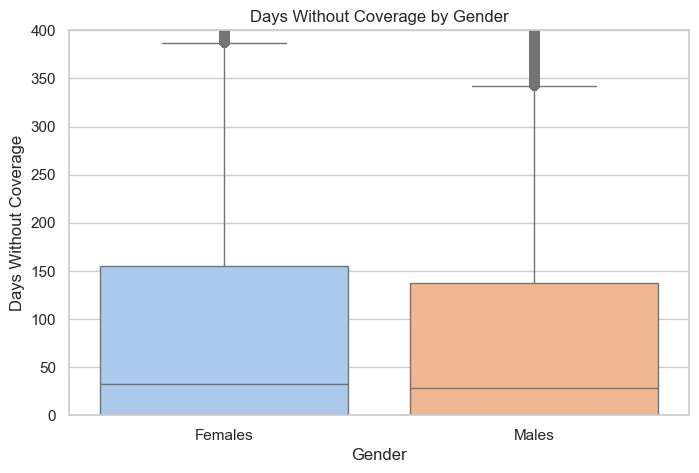

In [41]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='gender', y='days_without_coverage', hue='gender', palette='pastel', legend=False)

plt.ylim(0, 400)  # focus on the main refill range
plt.title('Days Without Coverage by Gender')
plt.xlabel('Gender')
plt.ylabel('Days Without Coverage')
plt.show()


### Interpreting the Gender Analysis
From the box chart, I observed that the women had slightly longer and more variable refill gaps while the men refilled sooner and more regularly. From the healthcare perspective, it means the women face more practical challenges that affects their refill consistency.

## 5. Analysing Adherence Patterns by Age Group
  
In this section, I compared refill gaps (`days_without_coverage`) across different age groups to understand behavioural differences.

This analysis helps healthcare teams design **age-specific interventions**:  
for example, mobile app reminders for younger patients, or pharmacy-led check-ins for elderly ones.


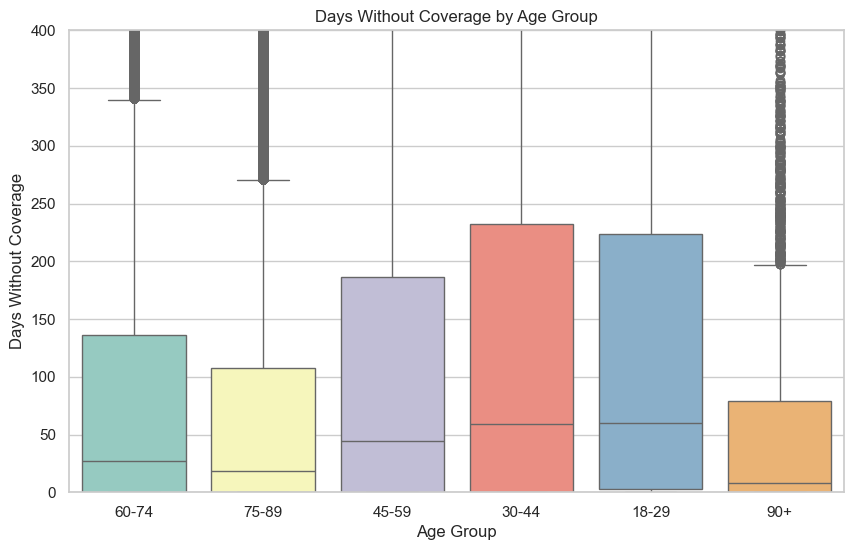

In [42]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='age_group', y='days_without_coverage', hue='age_group', palette='Set3', legend=False)
plt.ylim(0, 400)  # focus on the main refill range
plt.title('Days Without Coverage by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Days Without Coverage')
plt.show()


### Interpreting the Age Group Analysis

The boxplot shows that younger adults (18–29 and 30–44) had longer and more irregular refill gaps, suggesting lower adherence to statin therapy. This could be because younger patients often feel healthier and may underestimate the importance of continuous treatment.

In contrast, older patients (especially those aged 60–74 and 75–89) show shorter and more consistent refill gaps, indicating better medication adherence. This pattern suggests that as patients age and become more aware of health risks, they tend to manage their prescriptions more responsibly.

From a healthcare perspective, this insight supports the need for **targeted adherence interventions by age group**such as digital reminders or awareness campaigns for younger adults, and simpler prescription management systems for older populations.


## 6. Building a Predictive Model

After understanding the behavioural patterns in the data,I decided to **predict which patients are likely to become non-adherent** . 
These would be those that might experience long gaps (`days_without_coverage`) between prescriptions.


I will be using a  simple **machine learning classification model** to predict non-adherence based on patient demographics and prescription history.


In [44]:
# Create binary target
df['non_adherent'] = np.where(df['days_without_coverage'] >= 90, 1, 0)

# Check the balance
print(df['non_adherent'].value_counts(normalize=True))

# Select relevant features
features = ['gender', 'age_group', 'incident', 'order', 'statin_intensity']
target = 'non_adherent'

X = df[features]
y = df[target]

X_encoded = pd.get_dummies(X, drop_first=True)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))





non_adherent
0   0.66
1   0.34
Name: proportion, dtype: float64
Accuracy: 0.6639291816541375

Confusion Matrix:
 [[275343   1503]
 [138737   1710]]

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.99      0.80    276846
           1       0.53      0.01      0.02    140447

    accuracy                           0.66    417293
   macro avg       0.60      0.50      0.41    417293
weighted avg       0.62      0.66      0.54    417293



### Model Performance Summary

The logistic regression model achieved 66% accuracy overall, but this number is misleading 
because the dataset is imbalanced (66% adherent vs. 34% non-adherent patients).

The confusion matrix shows that while the model correctly identified most adherent patients, it failed to recognise many non-adherent ones — which are actually the cases of most interest for healthcare intervention.

**Interpretation:**
- The model is biased toward predicting "adherent" because that group dominates the data.
- Although accuracy appears acceptable, recall for non-adherence (1%) is extremely low.
- This means the model rarely flags the patients who are most at risk of dropping treatment.

In real-world terms, if used by a healthcare team, the model would *miss* many patients 
who need follow-up or support to continue their statin therapy.

Next, I will  address this imbalance problem and explore ways to improve the model’s sensitivity to non-adherent patients.


In [45]:

# Improved Model with Class Balancing
model_balanced = LogisticRegression(max_iter=1000, class_weight='balanced')
model_balanced.fit(X_train, y_train)

# Predict
y_pred_balanced = model_balanced.predict(X_test)

# Evaluate
print("Classification Report (Balanced Model):\n")
print(classification_report(y_test, y_pred_balanced))


Classification Report (Balanced Model):

              precision    recall  f1-score   support

           0       0.76      0.50      0.60    276846
           1       0.41      0.68      0.51    140447

    accuracy                           0.56    417293
   macro avg       0.58      0.59      0.56    417293
weighted avg       0.64      0.56      0.57    417293



After applying the class balancing, the model's ability to detect non-adherent patients improved. The ecall for the high-risk class increased from 1 per cent to 68 per cent, which means the model is now much more sensitive to patients who may discontinue their statin therapy.

9. Understanding What Drives Non-Adherence

Now that the balanced model is performing well enough to detect at-risk patients, I wanted to understand why the model thinks some patients stop their medication.

Logistic regression is helpful because it does not behave like a “black box.”
It gives coefficients that tell me which patient characteristics push someone towards adherence or towards non-adherence.

I use this section to turn the model into practical insights:

Which age groups struggle most?

Does statin intensity affect behaviour?

Are incident users more likely to stop?

Does prescription order matter?

These findings can help healthcare teams design targeted interventions rather than treating every patient the same.

In [46]:

#   Feature Importance for Balanced Logistic Regression


# Get feature names and coefficients
coefficients = pd.Series(
    model_balanced.coef_[0], 
    index=X_train.columns
).sort_values(ascending=False)

# Show top positive and negative contributors
top_positive = coefficients.head(10)
top_negative = coefficients.tail(10)

print("Top 10 factors increasing non-adherence:\n")
print(top_positive)

print("\nTop 10 factors increasing adherence:\n")
print(top_negative)


Top 10 factors increasing non-adherence:

statin_intensity_low/moderate    0.06
age_group_30-44                  0.00
gender_Males                    -0.13
age_group_45-59                 -0.18
incident                        -0.32
order                           -0.36
age_group_60-74                 -0.47
age_group_75-89                 -0.63
age_group_90+                   -0.96
dtype: float64

Top 10 factors increasing adherence:

statin_intensity_low/moderate    0.06
age_group_30-44                  0.00
gender_Males                    -0.13
age_group_45-59                 -0.18
incident                        -0.32
order                           -0.36
age_group_60-74                 -0.47
age_group_75-89                 -0.63
age_group_90+                   -0.96
dtype: float64


### **Interpreting the Model Coefficients**

The model helped me see which patients are more likely to experience long gaps in their statin treatment. Each coefficient shows whether a factor nudges someone slightly **towards non-adherence** or **towards staying consistent**.

Patients on **low or moderate statin intensity** had a slightly higher chance of becoming non-adherent. It is not a strong effect, but it suggests that when a medication seems “mild,” people sometimes relax with it.

The youngest group, **ages 30–44**, showed almost no clear direction. Their behaviour sits right in the middle.Some are consistent, some fall off, and the model couldn’t pin them down.

Ages **45–59** already show better patterns, and this keeps improving in older groups. Patients in the **60–74**, **75–89**, and especially the **90+** age groups were the most consistent with their prescriptions. 

 **New  statins users (incident patients)** also showed better adherence. 

The more prescriptions someone has completed (**higher order number**), the more reliable their pattern becomes. Once a patient has refilled a few times, it settles into a routine.

 **Gender** also played a small role. In this dataset,men were a little more adherent than women, but the gap was not  huge.

 


### **What These Patterns Mean for Healthcare Teams**

When I put all these behaviours together, a simple pattern starts to appear. The patients who are more likely to drift away from their medication tend to be younger, early in their treatment, or on lower-intensity statins. These groups may need a bit more support at the beginning: whether that is clearer communication, a reminder, or a quick follow-up after the first prescription.

On the other hand, older adults and long-term users were much more settled in their routines. Their adherence improves naturally with age and experience, which means healthcare teams can focus their energy where it matters most: the early stages of treatment and the younger population who often underestimate the importance of staying consistent.

These insights are not just numbers. They point to a practical opportunity to catch non-adherence early, before it turns into avoidable complications or higher cardiovascular risk.


### **Final Conclusion**

This project started as a simple exploration of statin prescription patterns, but it gradually revealed something more meaningful. By looking closely at refill behaviour, I could see clear differences across age, treatment intensity, and patient experience. Younger adults and patients on lower-intensity statins were more likely to have long gaps in their treatment, while older adults and long-term users were far more consistent.

The machine learning model helped confirm these patterns. Once the classes were balanced, the model was much better at spotting potential non-adherence early, which is the exact point where healthcare teams can make the most impact. Even though the model is simple, the insights it produced are practical and easy to act on.

Overall, this analysis shows how data can highlight small behavioural signals that matter in real life. A few early reminders, clearer communication, or structured follow-ups could help prevent gaps in treatment for the people who need it most. It is a reminder that good healthcare is not just about medication. It is also about understanding people and the patterns behind their decisions.


### **Power BI Dashboard Plan**

To make the insights from this project more accessible to healthcare teams, I created a simple plan for a Power BI dashboard. The goal is to summarise the important patterns in a way that supports quick, informed decisions.

**1. Overview Page**
- Total number of patients in the dataset  
- Percentage adherent vs non-adherent  
- Average treatment duration  
- Average days without coverage  

This gives a quick snapshot of the overall population.

**2. Adherence by Age Group**
- Bar chart showing adherence levels across age categories  
- A small note highlighting that adherence improves sharply from age 60 onward  

This helps teams identify which age groups may need targeted communication.

**3. Gender-Based Adherence Patterns**
- Boxplot or bar chart showing refill delays by gender  
- Clear indication of which group shows more variation  

Useful for designing gender-sensitive intervention strategies if needed.

**4. Treatment Intensity Dashboard**
- Visual comparing low/moderate vs high-intensity statin users  
- Filters for age, gender, and incident/persistent status  

Shows which treatment combinations have the highest risk of non-adherence.

**5. Early Stage Warning Signals**
- Chart showing adherence by prescription order (1st, 2nd, 3rd…)  
- Highlights that early prescriptions carry the highest risk of dropout  

This tells healthcare teams where to focus follow-up calls or reminders.

**6. Machine Learning Results**
- Simple card showing model accuracy  
- Table of top features influencing non-adherence  
- Traffic-light style indicator showing high-risk vs low-risk patients  

This turns the model into a practical tool for real-world decision-making.

Overall, this dashboard is meant to help teams move from data to action quickly. With a few filters and clear visuals, they can identify who might need support and intervene before gaps in medication turn into bigger problems.
